# imports e installs

In [18]:
%pip install keras_tuner
%pip install tensorflow
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error, root_mean_squared_error,mean_absolute_percentage_error
from sklearn.datasets import make_classification, make_regression, make_circles, make_moons
import warnings
warnings.filterwarnings('ignore')
import sys, os
sys.path.append(os.path.abspath('..'))
from pre_processamento.processamento_dados import processamento
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Guilherme\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Guilherme\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
base = processamento()

In [20]:
base.head()

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
DATETIME                                                
2010-01-01 00:00:00                               0.0   
2010-01-01 01:00:00                               0.0   
2010-01-01 02:00:00                               0.0   
2010-01-01 03:00:00                               0.0   
2010-01-01 04:00:00                               0.0   

                     PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  \
DATETIME                                                                     
2010-01-01 00:00:00                                             1011.0       
2010-01-01 01:00:00                                             1011.2       
2010-01-01 02:00:00                                             1011.1       
2010-01-01 03:00:00                                             1010.9       
2010-01-01 04:00:00                                             1010.2       

                     PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)  \
DATETIME                                                               
2010-01-01 00:00:00                                           1011.1   
2010-01-01 01:00:00                                           1011.2   
2010-01-01 02:00:00                                           1011.3   
2010-01-01 03:00:00                                           1011.2   
2010-01-01 04:00:00                                           1011.0   

                     PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)  \
DATETIME                                                                
2010-01-01 00:00:00                                            1010.5   
2010-01-01 01:00:00                                            1011.0   
2010-01-01 02:00:00                                            1011.1   
2010-01-01 03:00:00                                            1010.9   
2010-01-01 04:00:00                                            1010.2   

                     TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)  \
DATETIME                                                            
2010-01-01 00:00:00                                          21.1   
2010-01-01 01:00:00                                          20.8   
2010-01-01 02:00:00                                          20.5   
2010-01-01 03:00:00                                          20.0   
2010-01-01 04:00:00                                          19.5   

                     TEMPERATURA DO PONTO DE ORVALHO (°C)  \
DATETIME                                                    
2010-01-01 00:00:00                                  14.9   
2010-01-01 01:00:00                                  14.7   
2010-01-01 02:00:00                                  14.7   
2010-01-01 03:00:00                                  14.5   
2010-01-01 04:00:00                                  14.5   

                     TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)  \
DATETIME                                                          
2010-01-01 00:00:00                                        21.6   
2010-01-01 01:00:00                                        21.1   
2010-01-01 02:00:00                                        20.8   
2010-01-01 03:00:00                                        20.5   
2010-01-01 04:00:00                                        20.0   

                     TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)  \
DATETIME                                                          
2010-01-01 00:00:00                                        21.1   
2010-01-01 01:00:00                                        20.8   
2010-01-01 02:00:00                                        20.4   
2010-01-01 03:00:00                                        20.0   
2010-01-01 04:00:00                                        19.5   

                     TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)  \
DATETIME                                                                
2010-01-01 00:00:00                                        

# Testes para ver os resultados com e sem o uso de variáveis exógenas para assim decidir qual modelo vai passar por uma tunagem

## treinando o modelo com o ano de 2010/2011 e testando com 2012 **sem variáveis exógenas**


In [21]:
#Divisão do dataset em treino e teste
temp_treino_sem_exogena = base[base.index.year == 2010]
treino_sem_exogena = temp_treino_sem_exogena['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']
temp_validacao_sem_exogena = base[base.index.year == 2011]
validacao_sem_exogena = temp_validacao_sem_exogena['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']

In [22]:
target_column = 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'

treino_target_sem_exogena = temp_treino_sem_exogena[target_column].values.reshape(-1, 1)
val_target_sem_exogena = temp_validacao_sem_exogena[target_column].values.reshape(-1, 1)

target_scaler_sem_exogena = StandardScaler()
treino_target_scaled_sem_exogena = target_scaler_sem_exogena.fit_transform(treino_target_sem_exogena)
val_target_scaled_sem_exogena = target_scaler_sem_exogena.transform(val_target_sem_exogena)

print("Shape do Alvo Treino:", treino_target_scaled_sem_exogena.shape)

Shape do Alvo Treino: (8760, 1)


In [23]:
treino_combined_data_sem_exogena = treino_target_scaled_sem_exogena
val_combined_data_sem_exogena = val_target_scaled_sem_exogena

# 2. Verificar shapes
print("Shape final dos dados de treino:", treino_combined_data_sem_exogena.shape)
print("Shape final dos dados de validação:", val_combined_data_sem_exogena.shape)


print("Primeiras 5 linhas do treino:\n", treino_combined_data_sem_exogena[:5])

Shape final dos dados de treino: (8760, 1)
Shape final dos dados de validação: (8760, 1)
Primeiras 5 linhas do treino:
 [[ 0.2735459 ]
 [ 0.18621411]
 [ 0.13381503]
 [ 0.08141596]
 [-0.00591583]]


In [24]:
def create_multivariate_sequences(data, sequence_length):
    X, y = [], []
    # O loop para antes de estourar o array
    for i in range(len(data) - sequence_length):
        # X: Pega todas as colunas (Temp + Tempo) do passo atual até o tamanho da janela
        X.append(data[i:(i + sequence_length), :])

        # y: Pega APENAS a temperatura (coluna 0) do PRÓXIMO passo
        y.append(data[i + sequence_length, 0])

    return np.array(X), np.array(y)

sequence_length_sem_exogena = 12 

# Criação das sequências
X_train_final_sem_exogena, y_train_final_sem_exogena = create_multivariate_sequences(treino_combined_data_sem_exogena, sequence_length_sem_exogena)
X_val_final_sem_exogena, y_val_final_sem_exogena = create_multivariate_sequences(val_combined_data_sem_exogena, sequence_length_sem_exogena)

print("Shape of X_train_final:", X_train_final_sem_exogena.shape) # Deve ser (N, sequence lenght, 1)
print("Shape of y_train_final:", y_train_final_sem_exogena.shape) # Deve ser (N,)
print("Shape of X_val_final:", X_val_final_sem_exogena.shape)
print("Shape of y_val_final:", y_val_final_sem_exogena.shape)

Shape of X_train_final: (8748, 12, 1)
Shape of y_train_final: (8748,)
Shape of X_val_final: (8748, 12, 1)
Shape of y_val_final: (8748,)


In [25]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min',
    restore_best_weights=True
)

model_sem_exogena = Sequential()


model_sem_exogena.add(LSTM(units=64, activation='relu', return_sequences=False,
               input_shape=(X_train_final_sem_exogena.shape[1], X_train_final_sem_exogena.shape[2])))

model_sem_exogena.add(Dense(units=1)) # Saída: Previsão da Temperatura Escalonada

model_sem_exogena.compile(optimizer='adam', loss='mean_squared_error')

model_sem_exogena.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history_sem_exogena = model_sem_exogena.fit(
    X_train_final_sem_exogena,
    y_train_final_sem_exogena,
    epochs=100,
    batch_size=32,
    verbose=1,
    validation_data=(X_val_final_sem_exogena, y_val_final_sem_exogena),
    callbacks=[early_stopping]
)

print("Treinamento concluído.")

Epoch 1/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1573 - val_loss: 0.0351
Epoch 2/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0271 - val_loss: 0.0236
Epoch 3/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0214 - val_loss: 0.0205
Epoch 4/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0211 - val_loss: 0.0236
Epoch 5/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0200 - val_loss: 0.0192
Epoch 6/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0200 - val_loss: 0.0214
Epoch 7/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0203 - val_loss: 0.0206
Epoch 8/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0191 - val_loss: 0.0184
Epoch 9/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0193 - val_loss: 0.0199
Epoch 10/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0187 - val_loss: 0.0185
Epoch 11/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0189 - val_loss: 0.0195
Epoch 12/100
274/274 ━━━━━━━━━━━━━━━━━━━━

274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
MSE na Validação: 0.5416


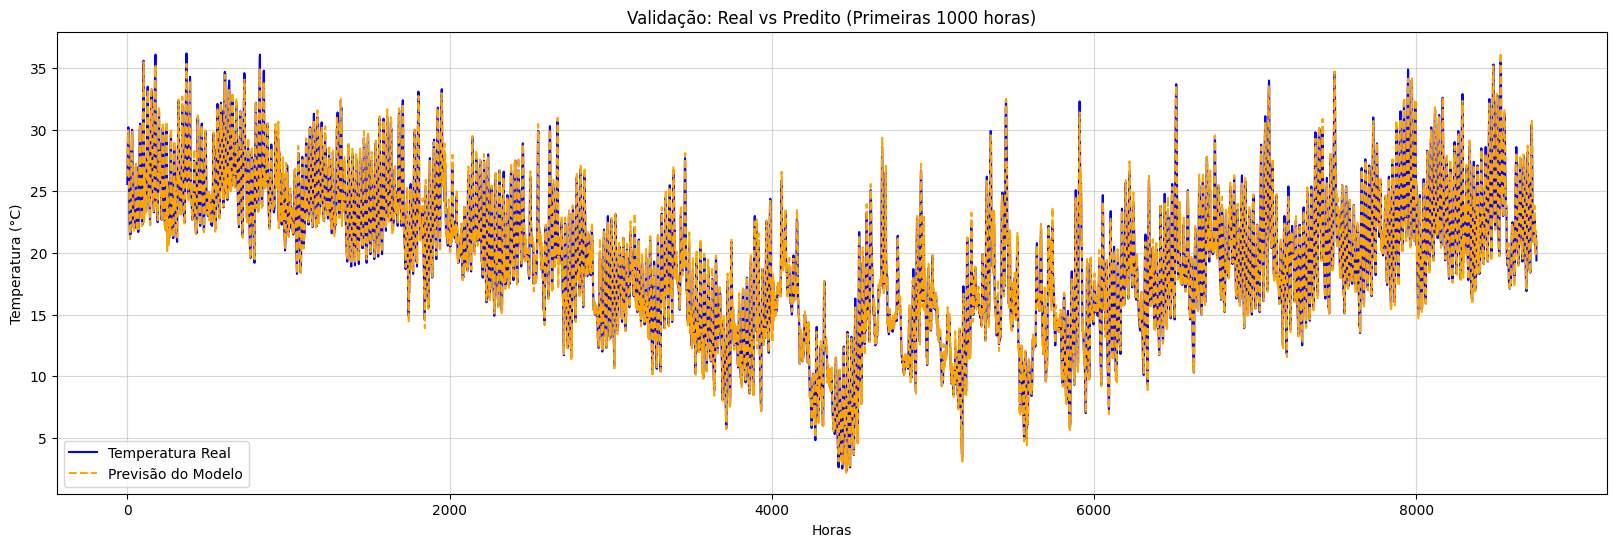

In [27]:
# 1. Previsão
predictions_scaled_sem_exogena = model_sem_exogena.predict(X_val_final_sem_exogena)

# 2. Desfazer a escala (Voltar para Graus Celsius)
predictions_real_sem_exogena = target_scaler_sem_exogena.inverse_transform(predictions_scaled_sem_exogena)
y_val_real_sem_exogena = target_scaler_sem_exogena.inverse_transform(y_val_final_sem_exogena.reshape(-1, 1))

# 3. Calcular Erro
mse_sem_exogena_val = mean_squared_error(y_val_real_sem_exogena, predictions_real_sem_exogena)
print(f"MSE na Validação: {mse_sem_exogena_val:.4f}")

plt.figure(figsize=(20, 6))
limit = 10000
plt.plot(y_val_real_sem_exogena[:limit], label='Temperatura Real', color='blue')
plt.plot(predictions_real_sem_exogena[:limit], label='Previsão do Modelo', color='orange', linestyle='--')

plt.title('Validação: Real vs Predito (Primeiras 1000 horas)')
plt.xlabel('Horas')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

### testando para o ano de 2012

In [28]:
target_column = 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'
temp_teste_sem_exogena = base[base.index.year == 2012]
teste_target_sem_exogena = temp_teste_sem_exogena[target_column].values.reshape(-1, 1)

teste_target_scaled_sem_exogena = target_scaler_sem_exogena.transform(teste_target_sem_exogena)

# 1. Combinar (Target Escalado + Exógenas Cíclicas)
teste_combined_data_sem_exogena = teste_target_scaled_sem_exogena
print("Shape dos dados de teste prontos:", teste_combined_data_sem_exogena.shape)

Shape dos dados de teste prontos: (8784, 1)


In [29]:
# 1. Criar as sequências
X_teste_ext_sem_exogena, y_teste_ext_sem_exogena = create_multivariate_sequences(teste_combined_data_sem_exogena, sequence_length_sem_exogena)

print("Shape de entrada para o modelo:", X_teste_ext_sem_exogena.shape)

# 2. Fazer a Predição
predictions_ext_scaled_sem_exogena = model_sem_exogena.predict(X_teste_ext_sem_exogena)

# 3. Desfazer a escala para ver os graus Celsius reais
predictions_ext_real_sem_exogena = target_scaler_sem_exogena.inverse_transform(predictions_ext_scaled_sem_exogena)
y_teste_real_sem_exogena = target_scaler_sem_exogena.inverse_transform(y_teste_ext_sem_exogena.reshape(-1, 1))

Shape de entrada para o modelo: (8772, 12, 1)
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


mse : 0.60
Erro Médio Absoluto (MAE) no Novo Dataset: 0.52 °C
Isso significa que o modelo erra, em média, 0.52 graus para cima ou para baixo.


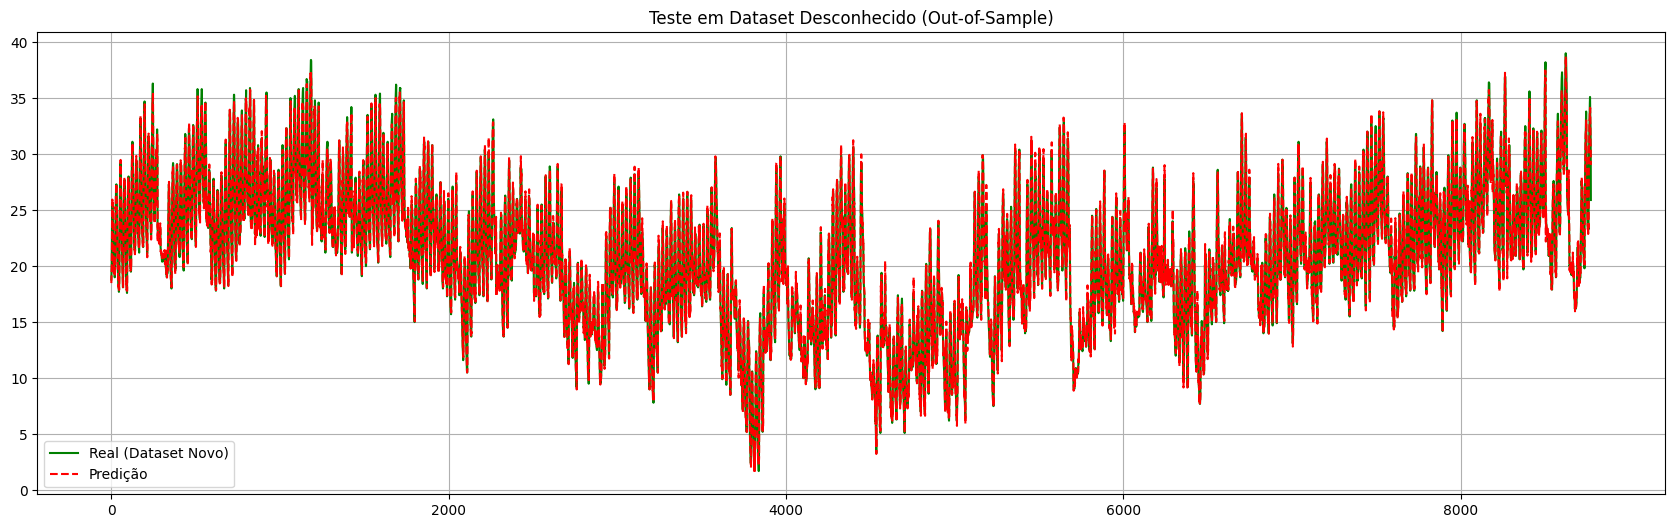

In [30]:
# Calcular erros
mse_ext_sem_exogena = mean_squared_error(y_teste_real_sem_exogena, predictions_ext_real_sem_exogena)
mae_ext_sem_exogena = mean_absolute_error(y_teste_real_sem_exogena, predictions_ext_real_sem_exogena)
print(f"mse : {mse_ext_sem_exogena:.2f}")
print(f"Erro Médio Absoluto (MAE) no Novo Dataset: {mae_ext_sem_exogena:.2f} °C")
print(f"Isso significa que o modelo erra, em média, {mae_ext_sem_exogena:.2f} graus para cima ou para baixo.")

# Plotar 
plt.figure(figsize=(21, 6))
limit = 10000
plt.plot(y_teste_real_sem_exogena[:limit], label='Real (Dataset Novo)', color='green')
plt.plot(predictions_ext_real_sem_exogena[:limit], label='Predição', color='red', linestyle='--')
plt.title('Teste em Dataset Desconhecido (Out-of-Sample)')
plt.legend()
plt.grid(True)
plt.show()

Tamanho das Datas: 8772
Tamanho das Predições: 8772


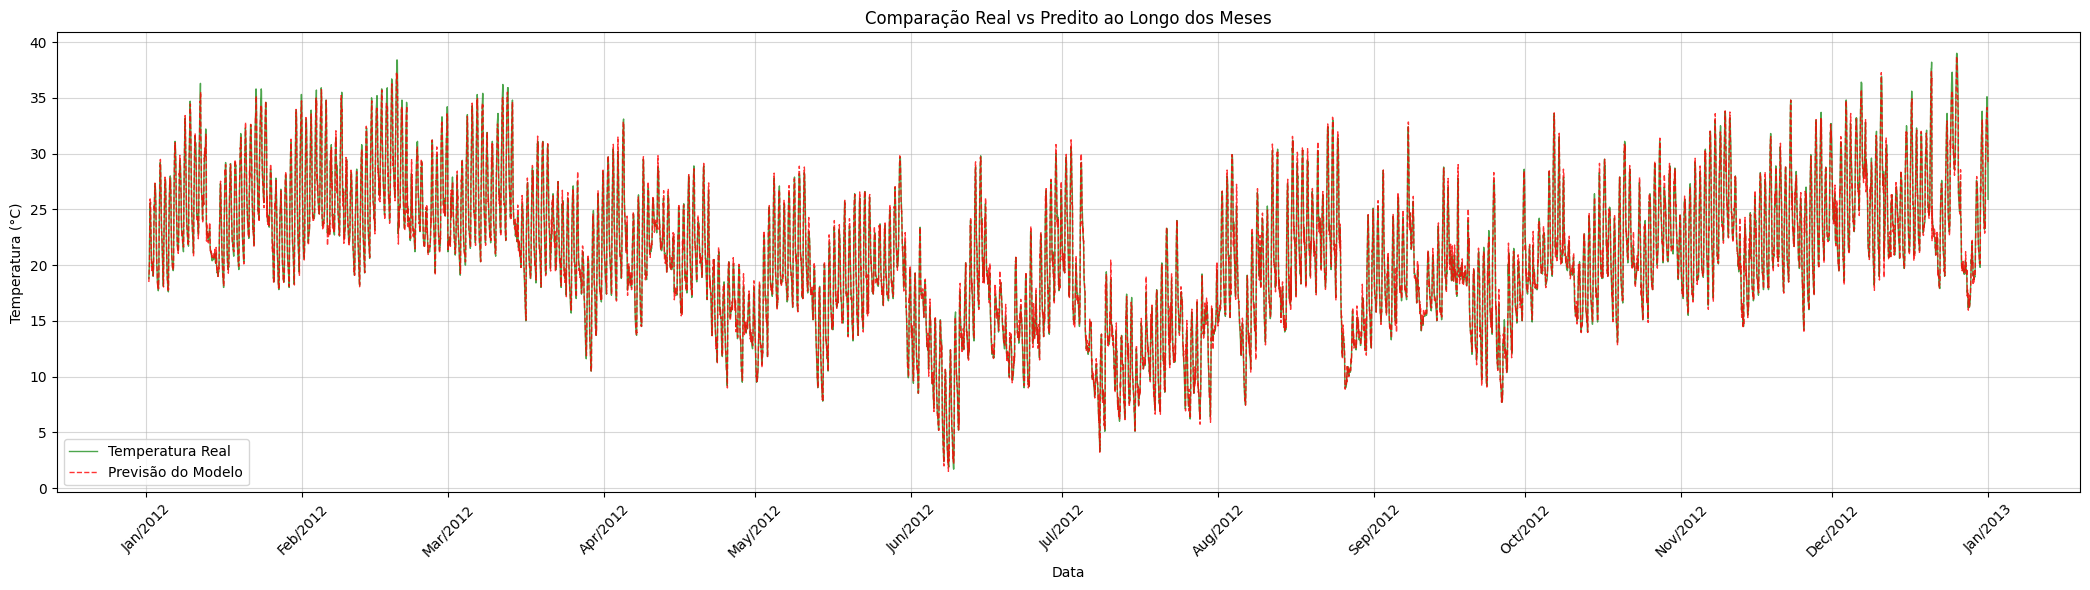

In [31]:
prediction_sequence_length_sem_exogena = X_teste_ext_sem_exogena.shape[1]
datas_correspondentes_sem_exogena = temp_teste_sem_exogena.index[prediction_sequence_length_sem_exogena:]


print(f"Tamanho das Datas: {len(datas_correspondentes_sem_exogena)}")
print(f"Tamanho das Predições: {len(predictions_ext_real_sem_exogena)}")

# 2. Criar um DataFrame temporário para facilitar a plotagem
df_resultado_sem_exogena = pd.DataFrame({
    'Real': y_teste_real_sem_exogena.flatten(),
    'Predito': predictions_ext_real_sem_exogena.flatten()
}, index=datas_correspondentes_sem_exogena)

# 3. Plotagem Formatada por Mês
fig, ax = plt.subplots(figsize=(21, 6))

ax.plot(df_resultado_sem_exogena.index, df_resultado_sem_exogena['Real'], label='Temperatura Real', color='green', linewidth=1, alpha=0.7)
ax.plot(df_resultado_sem_exogena.index, df_resultado_sem_exogena['Predito'], label='Previsão do Modelo', color='red', linewidth=1, alpha=0.8, linestyle='--')


# Define o formatador para mostrar o nome do mês (ex: Jan, Fev...)
ax.xaxis.set_major_locator(mdates.MonthLocator()) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y')) # Formato: "Jan/2022"

plt.title('Comparação Real vs Predito ao Longo dos Meses')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True, alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## treinando o modelo com o ano de 2010/2011 e testando com 2012 **com variáveis exógenas apenas DateTime**


In [32]:
#Divisão do dataset em treino e teste
temp_treino_com_exogena = base[base.index.year == 2010]
treino_com_exogena = temp_treino_com_exogena['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']
temp_validacao_com_exogena = base[base.index.year == 2011]
validacao_com_exogena = temp_validacao_com_exogena['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']

In [33]:
# --- FUNÇÃO AUXILIAR PARA CRIAR O TEMPO CÍCLICO ---
def adicionar_tempo_ciclico(df):
    df_copy = df.copy()


    # 1. Transformação da HORA (Ciclo Diário)
    # Permite ao modelo aprender ciclo dia/noite
    df_copy['hora_sin'] = np.sin(2 * np.pi * df_copy.index.hour / 24)
    df_copy['hora_cos'] = np.cos(2 * np.pi * df_copy.index.hour / 24)

    # 2. Transformação do DIA DO ANO (Ciclo Anual - Substitui Mês e Dia)
    # Permite ao modelo aprender Verão/Inverno de forma contínua
    df_copy['dia_ano_sin'] = np.sin(2 * np.pi * df_copy.index.dayofyear / 365.25)
    df_copy['dia_ano_cos'] = np.cos(2 * np.pi * df_copy.index.dayofyear / 365.25)

    return df_copy

# 1. Aplicar a transformação nos DataFrames
temp_treino_com_exogena_proc = adicionar_tempo_ciclico(temp_treino_com_exogena)
temp_validacao_com_exogena_proc = adicionar_tempo_ciclico(temp_validacao_com_exogena)

# 2. Defina as colunas
target_column = 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'
# As novas colunas exógenas agora são matemáticas (Seno/Cosseno)
exog_columns = ['hora_sin', 'hora_cos', 'dia_ano_sin', 'dia_ano_cos']

# 3. Extraia e escale APENAS a variável alvo (Temperatura)
# Variáveis exógenas (Sin/Cos) JÁ estão na escala correta (-1 a 1), não precisam de Scaler.
treino_target_com_exogena = temp_treino_com_exogena_proc[target_column].values.reshape(-1, 1)
val_target_com_exogena = temp_validacao_com_exogena_proc[target_column].values.reshape(-1, 1)

target_scaler_com_exogena = StandardScaler()
treino_target_scaled_com_exogena = target_scaler_com_exogena.fit_transform(treino_target_com_exogena)
val_target_scaled_com_exogena = target_scaler_com_exogena.transform(val_target_com_exogena)

# 4. Extraia as variáveis exógenas (sem aplicar StandardScaler nelas)
treino_exog = temp_treino_com_exogena_proc[exog_columns].values
val_exog = temp_validacao_com_exogena_proc[exog_columns].values

print("Shape do Alvo Treino:", treino_target_scaled_com_exogena.shape)
print("Shape das Exógenas Treino:", treino_exog.shape)
print("Exemplo de Exógena (Hora Sin/Cos, Ano Sin/Cos):\n", treino_exog[:2])

Shape do Alvo Treino: (8760, 1)
Shape das Exógenas Treino: (8760, 4)
Exemplo de Exógena (Hora Sin/Cos, Ano Sin/Cos):
 [[0.         1.         0.01720158 0.99985204]
 [0.25881905 0.96592583 0.01720158 0.99985204]]


In [34]:
# 1. Combinar Temperatura (Escalada) com Tempo (Seno/Cosseno)
# A estrutura será: [Temperatura, Hora_Sin, Hora_Cos, DiaAno_Sin, DiaAno_Cos]
treino_combined_data_com_exogena = np.hstack((treino_target_scaled_com_exogena, treino_exog))
val_combined_data_com_exogena = np.hstack((val_target_scaled_com_exogena, val_exog))

# 2. Verificar shapes
print("Shape final dos dados de treino:", treino_combined_data_com_exogena.shape)
print("Shape final dos dados de validação:", val_combined_data_com_exogena.shape)

# O resultado deve ter 5 colunas (1 alvo + 4 tempo)
print("Primeiras 5 linhas do treino:\n", treino_combined_data_com_exogena[:5])

Shape final dos dados de treino: (8760, 5)
Shape final dos dados de validação: (8760, 5)
Primeiras 5 linhas do treino:
 [[ 0.2735459   0.          1.          0.01720158  0.99985204]
 [ 0.18621411  0.25881905  0.96592583  0.01720158  0.99985204]
 [ 0.13381503  0.5         0.8660254   0.01720158  0.99985204]
 [ 0.08141596  0.70710678  0.70710678  0.01720158  0.99985204]
 [-0.00591583  0.8660254   0.5         0.01720158  0.99985204]]


In [35]:

def create_multivariate_sequences(data, sequence_length):
    X, y = [], []
    # O loop para antes de estourar o array
    for i in range(len(data) - sequence_length):
        # X: Pega todas as colunas (Temp + Tempo) do passo atual até o tamanho da janela
        X.append(data[i:(i + sequence_length), :])

        # y: Pega APENAS a temperatura (coluna 0) do PRÓXIMO passo
        y.append(data[i + sequence_length, 0])

    return np.array(X), np.array(y)

sequence_length_com_exogena = 8

# Criação das sequências
X_train_final_com_exogena, y_train_final_com_exogena = create_multivariate_sequences(treino_combined_data_com_exogena, sequence_length_com_exogena)
X_val_final_com_exogena, y_val_final_com_exogena = create_multivariate_sequences(val_combined_data_com_exogena, sequence_length_com_exogena)

print("Shape of X_train_final:", X_train_final_com_exogena.shape) # Deve ser (N, sequence lenght, 5)
print("Shape of y_train_final:", y_train_final_com_exogena.shape) # Deve ser (N,)
print("Shape of X_val_final:", X_val_final_com_exogena.shape)
print("Shape of y_val_final:", y_val_final_com_exogena.shape)

Shape of X_train_final: (8752, 8, 5)
Shape of y_train_final: (8752,)
Shape of X_val_final: (8752, 8, 5)
Shape of y_val_final: (8752,)


In [36]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min',
    restore_best_weights=True
)

model_com_exogena = Sequential()

# Input Shape será (24, 5)
# O modelo vai aprender: "Dada a temperatura E a hora das últimas 24h, qual a temp agora?"
model_com_exogena.add(LSTM(units=64, activation='relu', return_sequences=False,
               input_shape=(X_train_final_com_exogena.shape[1], X_train_final_com_exogena.shape[2])))

model_com_exogena.add(Dense(units=1))

model_com_exogena.compile(optimizer='adam', loss='mean_squared_error')

model_com_exogena.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 64)             │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,985 (70.25 KB)

 Trainable params: 17,985 (70.25 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history_com_exogena = model_com_exogena.fit(
    X_train_final_com_exogena,
    y_train_final_com_exogena,
    epochs=100,
    batch_size=32,
    verbose=1,
    validation_data=(X_val_final_com_exogena, y_val_final_com_exogena),
    callbacks=[early_stopping]
)

print("Treinamento concluído.")

Epoch 1/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1162 - val_loss: 0.0397
Epoch 2/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0253 - val_loss: 0.0321
Epoch 3/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0200 - val_loss: 0.0188
Epoch 4/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0176 - val_loss: 0.0189
Epoch 5/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0167 - val_loss: 0.0161
Epoch 6/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0157 - val_loss: 0.0169
Epoch 7/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0160 - val_loss: 0.0156
Epoch 8/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0157 - val_loss: 0.0155
Epoch 9/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0147 - val_loss: 0.0148
Epoch 10/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0148 - val_loss: 0.0150
Epoch 11/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0147 - val_loss: 0.0150
Epoch 12/100
274/274 ━━━━━━━━━━━━━━━━━━━━

274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
MSE na Validação: 0.4344


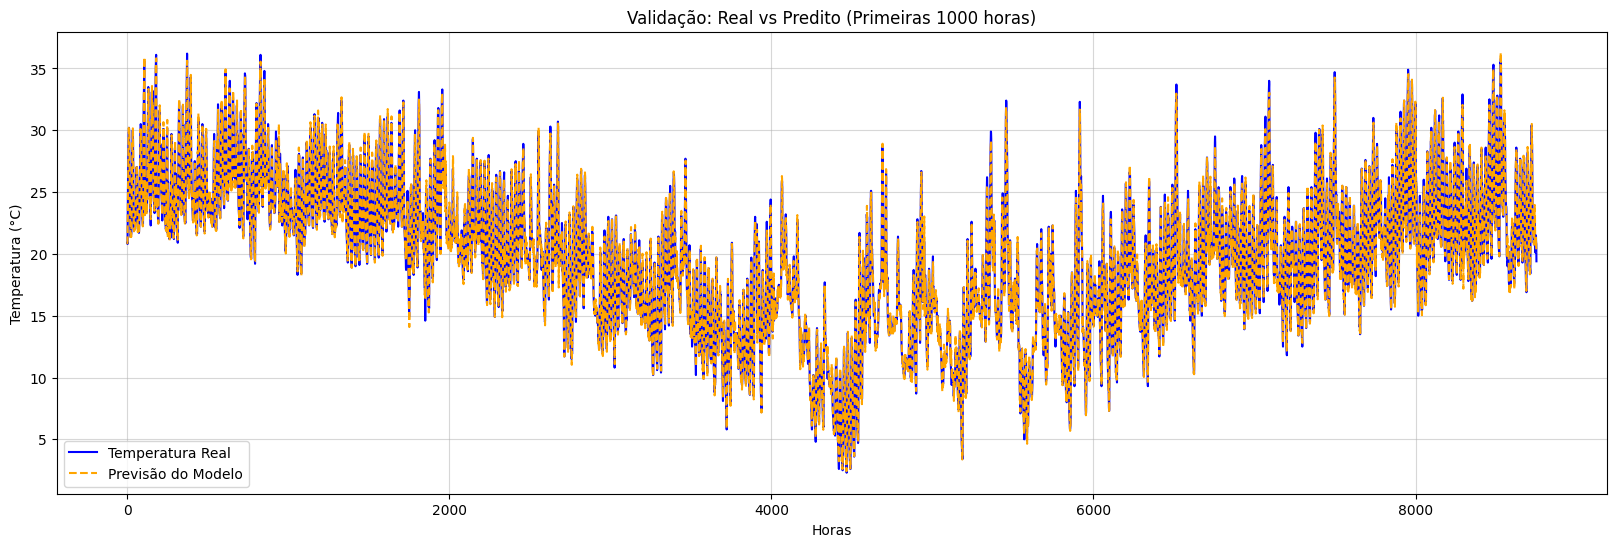

In [38]:
predictions_scaled_com_exogena = model_com_exogena.predict(X_val_final_com_exogena)

# 1. Desfazer a escala (Voltar para Graus Celsius)

predictions_real_com_exogena = target_scaler_com_exogena.inverse_transform(predictions_scaled_com_exogena)
y_val_real_com_exogena = target_scaler_com_exogena.inverse_transform(y_val_final_com_exogena.reshape(-1, 1))

# 2. Calcular Erro
mse_com_exogena_val = mean_squared_error(y_val_real_com_exogena, predictions_real_com_exogena)
print(f"MSE na Validação: {mse_com_exogena_val:.4f}")

plt.figure(figsize=(20, 6))

limit = 10000
plt.plot(y_val_real_com_exogena[:limit], label='Temperatura Real', color='blue')
plt.plot(predictions_real_com_exogena[:limit], label='Previsão do Modelo', color='orange', linestyle='--')

plt.title('Validação: Real vs Predito (Primeiras 1000 horas)')
plt.xlabel('Horas')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

### testando para o ano de 2012

In [39]:
# Aplique EXATAMENTE a mesma função de engenharia de features usada no treino
temp_teste_com_exogena = base[base.index.year == 2012]
temp_teste_com_exogena = adicionar_tempo_ciclico(temp_teste_com_exogena)

target_column = 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'
exog_columns= ['hora_sin', 'hora_cos', 'dia_ano_sin', 'dia_ano_cos']

# Verifique se não há NaNs (o shift ou cálculo pode gerar nulos nas pontas)
temp_teste_com_exogena = temp_teste_com_exogena.dropna()

In [40]:

teste_target_com_exogena = temp_teste_com_exogena[target_column].values.reshape(-1, 1)


teste_exog_com_exogena = temp_teste_com_exogena[exog_columns].values

teste_target_scaled_com_exogena = target_scaler_com_exogena.transform(teste_target_com_exogena)

teste_combined_data_com_exogena = np.hstack((teste_target_scaled_com_exogena, teste_exog_com_exogena))

print("Shape dos dados de teste prontos:", teste_combined_data_com_exogena.shape)

Shape dos dados de teste prontos: (8784, 5)


In [41]:
# 1. Criar as sequências (Janelas)
X_teste_ext_com_exogena, y_teste_ext_com_exogena = create_multivariate_sequences(teste_combined_data_com_exogena, sequence_length_com_exogena)

print("Shape de entrada para o modelo:", X_teste_ext_com_exogena.shape)

# 2. Fazer a Predição
predictions_ext_scaled_com_exogena = model_com_exogena.predict(X_teste_ext_com_exogena)

# 3. Desfazer a escala para ver os graus Celsius reais
predictions_ext_real_com_exogena = target_scaler_com_exogena.inverse_transform(predictions_ext_scaled_com_exogena)
y_teste_real_com_exogena = target_scaler_com_exogena.inverse_transform(y_teste_ext_com_exogena.reshape(-1, 1))

Shape de entrada para o modelo: (8776, 8, 5)
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


mse : 0.49
Erro Médio Absoluto (MAE) no Novo Dataset: 0.47 °C
Isso significa que o modelo erra, em média, 0.47 graus para cima ou para baixo.


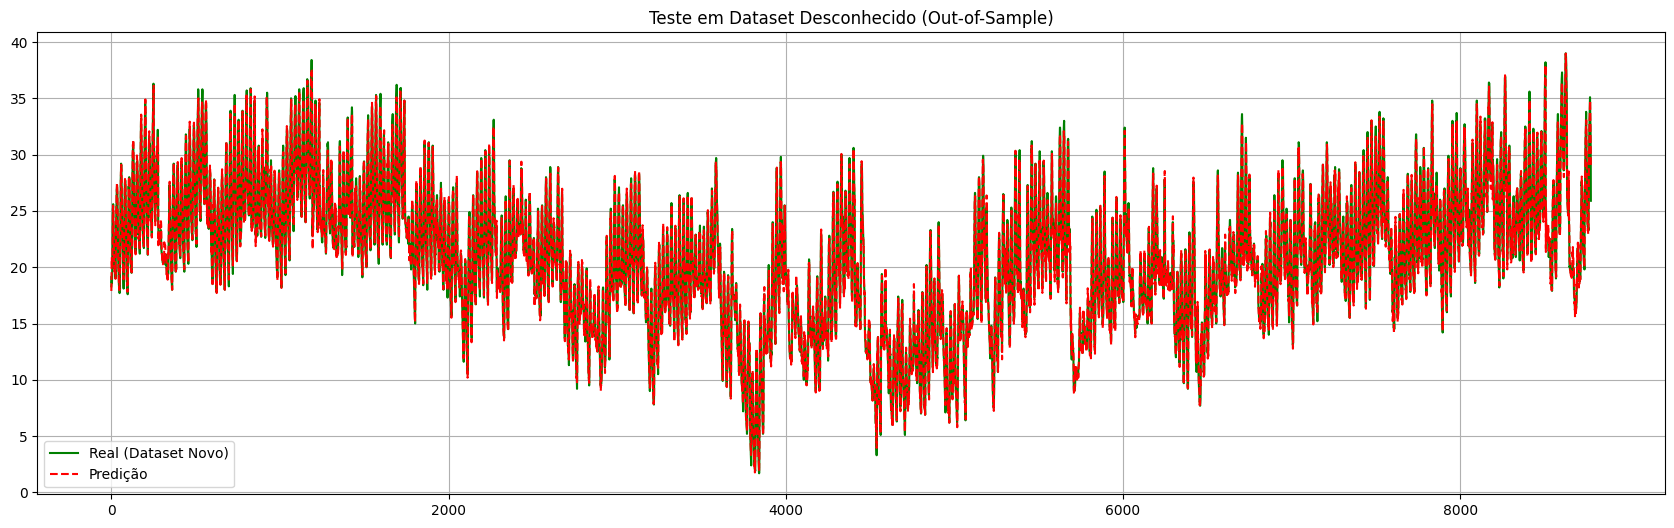

In [42]:
# Calcular erros
mse_ext_com_exogena = mean_squared_error(y_teste_real_com_exogena, predictions_ext_real_com_exogena)
mae_ext_com_exogena = mean_absolute_error(y_teste_real_com_exogena, predictions_ext_real_com_exogena)
print(f"mse : {mse_ext_com_exogena:.2f}")
print(f"Erro Médio Absoluto (MAE) no Novo Dataset: {mae_ext_com_exogena:.2f} °C")
print(f"Isso significa que o modelo erra, em média, {mae_ext_com_exogena:.2f} graus para cima ou para baixo.")

# Plotar um trecho
plt.figure(figsize=(21, 6))
limit = 10000 # Visualizar as primeiras 300 horas
plt.plot(y_teste_real_com_exogena[:limit], label='Real (Dataset Novo)', color='green')
plt.plot(predictions_ext_real_com_exogena[:limit], label='Predição', color='red', linestyle='--')
plt.title('Teste em Dataset Desconhecido (Out-of-Sample)')
plt.legend()
plt.grid(True)
plt.show()

Tamanho das Datas: 8776
Tamanho das Predições: 8776


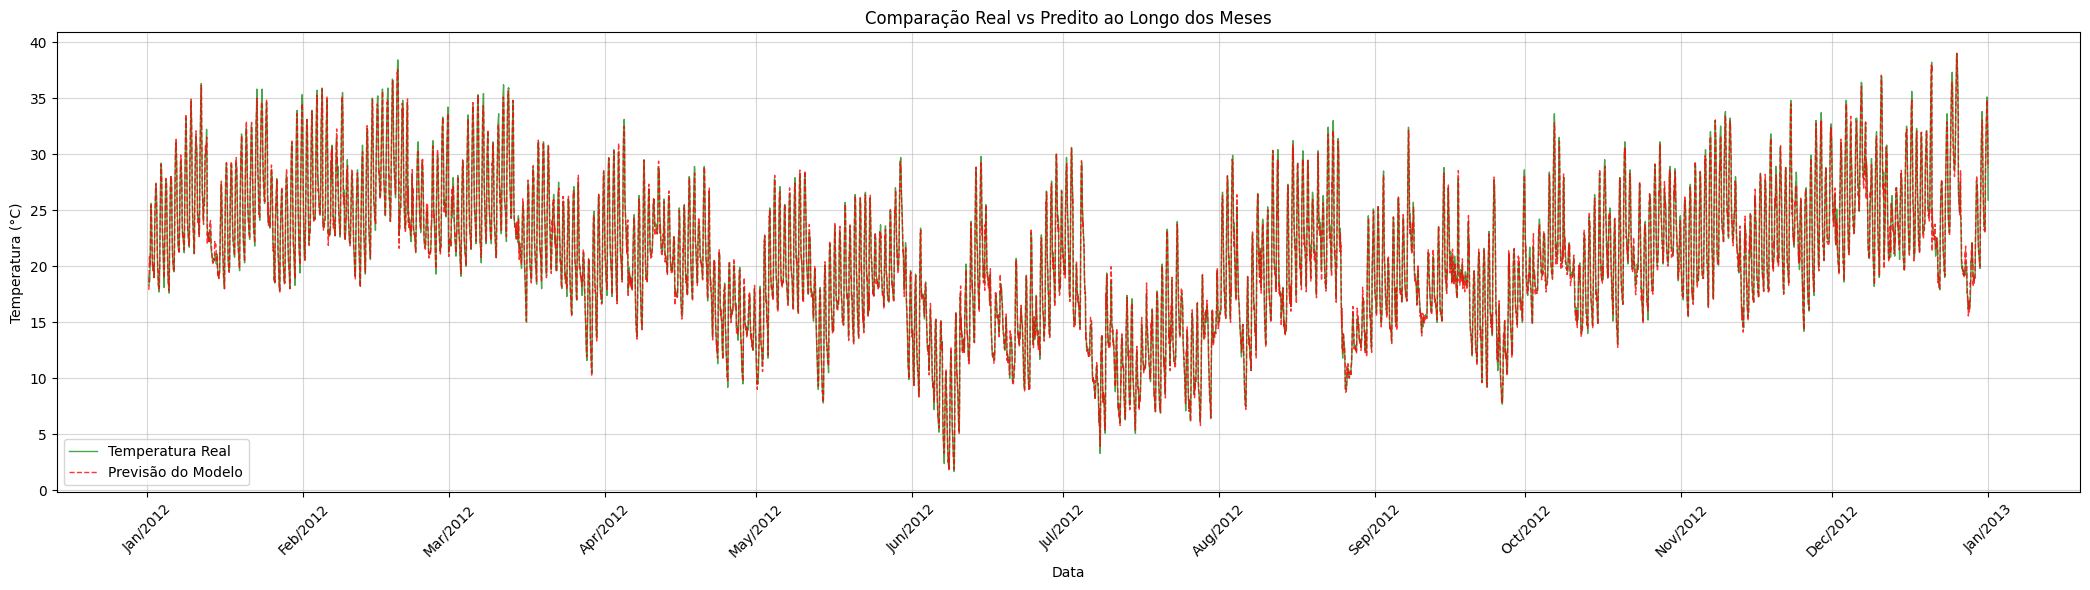

In [43]:
prediction_sequence_length_com_exogena = X_teste_ext_com_exogena.shape[1]
datas_correspondentes_com_exogena = temp_teste_com_exogena.index[prediction_sequence_length_com_exogena:]

print(f"Tamanho das Datas: {len(datas_correspondentes_com_exogena)}")
print(f"Tamanho das Predições: {len(predictions_ext_real_com_exogena)}")

df_resultado_com_exogena = pd.DataFrame({
    'Real': y_teste_real_com_exogena.flatten(),
    'Predito': predictions_ext_real_com_exogena.flatten()
}, index=datas_correspondentes_com_exogena)

# 1. Plotagem Formatada por Mês
fig, ax = plt.subplots(figsize=(21, 6))

ax.plot(df_resultado_com_exogena.index, df_resultado_com_exogena['Real'], label='Temperatura Real', color='green', linewidth=1, alpha=0.7)
ax.plot(df_resultado_com_exogena.index, df_resultado_com_exogena['Predito'], label='Previsão do Modelo', color='red', linewidth=1, alpha=0.8, linestyle='--')

# Define o formatador para mostrar o nome do mês (ex: Jan, Fev...)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y')) # Formato: "Jan/2022"

plt.title('Comparação Real vs Predito ao Longo dos Meses')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True, alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## treinando o modelo com o ano de 2010/2011 e testando com 2012 **com variáveis exógenas DateTime e físicas**

In [44]:
#Divisão do dataset em treino e teste
temp_treino_multi_exogena = base[base.index.year == 2010]
treino_multi_exogena = temp_treino_multi_exogena['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']
temp_validacao_multi_exogena = base[base.index.year == 2011]
validacao_multi_exogena = temp_validacao_multi_exogena['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']

In [45]:
def adicionar_tempo_ciclico(df):
    df_copy = df.copy()

    df_copy['hora_sin'] = np.sin(2 * np.pi * df_copy.index.hour / 24)
    df_copy['hora_cos'] = np.cos(2 * np.pi * df_copy.index.hour / 24)

    df_copy['dia_ano_sin'] = np.sin(2 * np.pi * df_copy.index.dayofyear / 365.25)
    df_copy['dia_ano_cos'] = np.cos(2 * np.pi * df_copy.index.dayofyear / 365.25)

    return df_copy

temp_treino_multi_exogena_proc = adicionar_tempo_ciclico(temp_treino_multi_exogena)
temp_validacao_multi_exogena_proc = adicionar_tempo_ciclico(temp_validacao_multi_exogena)

# 2. Defina as colunas
target_column = 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'

exog_columns_datetime = ['hora_sin', 'hora_cos', 'dia_ano_sin', 'dia_ano_cos']
exog_columns_fisicas = [
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'VENTO, RAJADA MAXIMA (m/s)'
]

# 3. Extraia e escale APENAS a variável alvo (Temperatura)
treino_target_multi_exogena = temp_treino_multi_exogena_proc[target_column].values.reshape(-1, 1)
val_target_multi_exogena = temp_validacao_multi_exogena_proc[target_column].values.reshape(-1, 1)

target_scaler_multi_exogena = StandardScaler()
treino_target_scaled_multi_exogena = target_scaler_multi_exogena.fit_transform(treino_target_multi_exogena)
val_target_scaled_multi_exogena = target_scaler_multi_exogena.transform(val_target_multi_exogena)

# 4. Extraia as variáveis exógenas
treino_exog_datetime = temp_treino_multi_exogena_proc[exog_columns_datetime].values
val_exog_datetime = temp_validacao_multi_exogena_proc[exog_columns_datetime].values

treino_exog_fisicas = temp_treino_multi_exogena_proc[exog_columns_fisicas].values
val_exog_fisicas = temp_validacao_multi_exogena_proc[exog_columns_fisicas].values

# 
fisicas_exog_scaler = StandardScaler()
treino_exog_fisicas_scaled = fisicas_exog_scaler.fit_transform(treino_exog_fisicas)
val_exog_fisicas_scaled = fisicas_exog_scaler.transform(val_exog_fisicas)

# 
treino_multi_exogena = np.hstack((treino_exog_datetime, treino_exog_fisicas_scaled))
val_multi_exogena = np.hstack((val_exog_datetime, val_exog_fisicas_scaled))

print("Shape do Alvo Treino:", treino_target_scaled_multi_exogena.shape)
print("Shape das Exógenas Treino:", treino_multi_exogena.shape)
print("Exemplo de Exógena (Hora Sin/Cos, Ano Sin/Cos, Físicas Escalonadas):\n", treino_multi_exogena[:2])

Shape do Alvo Treino: (8760, 1)
Shape das Exógenas Treino: (8760, 7)
Exemplo de Exógena (Hora Sin/Cos, Ano Sin/Cos, Físicas Escalonadas):
 [[ 0.          1.          0.01720158  0.99985204  0.2219003  -0.51265948
   0.50632327]
 [ 0.25881905  0.96592583  0.01720158  0.99985204  0.25487144 -0.51265948
   0.73699887]]


In [46]:
# 1. Combinar Temperatura (Escalada) com Tempo (Seno/Cosseno) e Exógenas Físicas Escaladas
treino_combined_data_multi_exogena = np.hstack((treino_target_scaled_multi_exogena, treino_multi_exogena))
val_combined_data_multi_exogena = np.hstack((val_target_scaled_multi_exogena, val_multi_exogena))

# 2. Verificar shapes
print("Shape final dos dados de treino:", treino_combined_data_multi_exogena.shape)
print("Shape final dos dados de validação:", val_combined_data_multi_exogena.shape)

# O resultado deve ter 8 colunas (1 alvo + 4 tempo + 3 físicas)
print("Primeiras 5 linhas do treino:\n", treino_combined_data_multi_exogena[:5])

Shape final dos dados de treino: (8760, 8)
Shape final dos dados de validação: (8760, 8)
Primeiras 5 linhas do treino:
 [[ 0.2735459   0.          1.          0.01720158  0.99985204  0.2219003
  -0.51265948  0.50632327]
 [ 0.18621411  0.25881905  0.96592583  0.01720158  0.99985204  0.25487144
  -0.51265948  0.73699887]
 [ 0.13381503  0.5         0.8660254   0.01720158  0.99985204  0.23838587
  -0.38035441  0.69855293]
 [ 0.08141596  0.70710678  0.70710678  0.01720158  0.99985204  0.20541473
  -0.31420188  0.62166107]
 [-0.00591583  0.8660254   0.5         0.01720158  0.99985204  0.09001573
  -0.18189681  0.23720175]]


In [47]:
def create_multivariate_sequences(data, sequence_length):
    X, y = [], []
    # O loop para antes de estourar o array
    for i in range(len(data) - sequence_length):
        # X: Pega todas as colunas (Temp + Tempo) do passo atual até o tamanho da janela
        X.append(data[i:(i + sequence_length), :])

        # y: Pega APENAS a temperatura (coluna 0) do PRÓXIMO passo
        y.append(data[i + sequence_length, 0])

    return np.array(X), np.array(y)

sequence_length_multi_exogena = 8

# Criação das sequências
X_train_final_multi_exogena, y_train_final_multi_exogena = create_multivariate_sequences(treino_combined_data_multi_exogena, sequence_length_multi_exogena)
X_val_final_multi_exogena, y_val_final_multi_exogena = create_multivariate_sequences(val_combined_data_multi_exogena, sequence_length_multi_exogena)

print("Shape of X_train_final:", X_train_final_multi_exogena.shape) # Deve ser (N, sequence lenght, 8)
print("Shape of y_train_final:", y_train_final_multi_exogena.shape) # Deve ser (N,)
print("Shape of X_val_final:", X_val_final_multi_exogena.shape)
print("Shape of y_val_final:", y_val_final_multi_exogena.shape)

Shape of X_train_final: (8752, 8, 8)
Shape of y_train_final: (8752,)
Shape of X_val_final: (8752, 8, 8)
Shape of y_val_final: (8752,)


In [48]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min',
    restore_best_weights=True
)

model_multi_exogena = Sequential()

# Input Shape será (24, 5)
# O modelo vai aprender: "Dada a temperatura E a hora das últimas 24h, qual a temp agora?"
model_multi_exogena.add(LSTM(units=64, activation='relu', return_sequences=False,
               input_shape=(X_train_final_multi_exogena.shape[1], X_train_final_multi_exogena.shape[2])))

model_multi_exogena.add(Dense(units=1)) # Saída: Previsão da Temperatura Escalonada

model_multi_exogena.compile(optimizer='adam', loss='mean_squared_error')

model_multi_exogena.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 64)             │        18,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,753 (73.25 KB)

 Trainable params: 18,753 (73.25 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
history_multi_exogena = model_multi_exogena.fit(
    X_train_final_multi_exogena,
    y_train_final_multi_exogena,
    epochs=100,
    batch_size=32,
    verbose=1,
    validation_data=(X_val_final_multi_exogena, y_val_final_multi_exogena),
    callbacks=[early_stopping]
)

print("Treinamento concluído.")

Epoch 1/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0904 - val_loss: 0.0247
Epoch 2/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0195 - val_loss: 0.0190
Epoch 3/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0152 - val_loss: 0.0137
Epoch 4/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0131 - val_loss: 0.0130
Epoch 5/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0122 - val_loss: 0.0129
Epoch 6/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0117 - val_loss: 0.0110
Epoch 7/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0113 - val_loss: 0.0112
Epoch 8/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0110 - val_loss: 0.0108
Epoch 9/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0108 - val_loss: 0.0106
Epoch 10/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0104 - val_loss: 0.0108
Epoch 11/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0100 - val_loss: 0.0103
Epoch 12/100
274/274 ━━━━━━━━━━━━━━━━━━━━

274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MSE na Validação: 0.3018


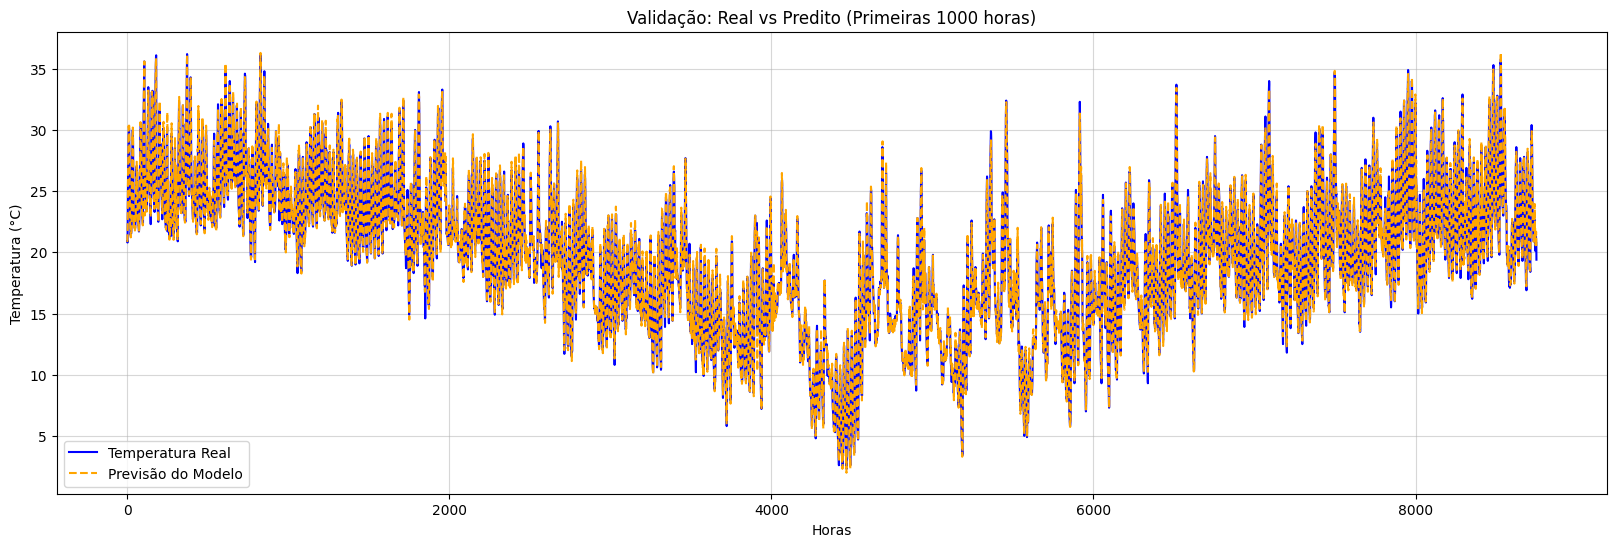

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

predictions_scaled_multi_exogena = model_multi_exogena.predict(X_val_final_multi_exogena)


predictions_real_multi_exogena = target_scaler_multi_exogena.inverse_transform(predictions_scaled_multi_exogena)
y_val_real_multi_exogena = target_scaler_multi_exogena.inverse_transform(y_val_final_multi_exogena.reshape(-1, 1))

# Calcular Erro
mse_multi_exogena_val = mean_squared_error(y_val_real_multi_exogena, predictions_real_multi_exogena)
print(f"MSE na Validação: {mse_multi_exogena_val:.4f}")


plt.figure(figsize=(20, 6))
limit = 10000
plt.plot(y_val_real_multi_exogena[:limit], label='Temperatura Real', color='blue')
plt.plot(predictions_real_multi_exogena[:limit], label='Previsão do Modelo', color='orange', linestyle='--')

plt.title('Validação: Real vs Predito (Primeiras 1000 horas)')
plt.xlabel('Horas')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

### testando para o ano de 2012

In [51]:
temp_teste_multi_exogena = base[base.index.year == 2012]
temp_teste_multi_exogena = adicionar_tempo_ciclico(temp_teste_multi_exogena)

target_column = 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'
exog_columns_datetime = ['hora_sin', 'hora_cos', 'dia_ano_sin', 'dia_ano_cos']
exog_columns_fisicas = [
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'VENTO, RAJADA MAXIMA (m/s)'
]

# Verifique se não há NaNs (o shift ou cálculo pode gerar nulos nas pontas)
temp_teste_multi_exogena = temp_teste_multi_exogena.dropna()

In [52]:
teste_target_multi_exogena = temp_teste_multi_exogena[target_column].values.reshape(-1, 1)


teste_exog_datetime = temp_teste_multi_exogena[exog_columns_datetime].values
teste_exog_fisicas = temp_teste_multi_exogena[exog_columns_fisicas].values

teste_exog_fisicas_scaled = fisicas_exog_scaler.transform(teste_exog_fisicas)
teste_multi_exogena = np.hstack((teste_exog_datetime, teste_exog_fisicas_scaled))

teste_target_scaled_multi_exogena = target_scaler_multi_exogena.transform(teste_target_multi_exogena)


teste_combined_data_multi_exogena = np.hstack((teste_target_scaled_multi_exogena, teste_multi_exogena))

print("Shape dos dados de teste prontos:", teste_combined_data_multi_exogena.shape)

Shape dos dados de teste prontos: (8784, 8)


In [53]:
# 1. Criar as sequências (Janelas)

X_teste_ext_multi_exogena, y_teste_ext_multi_exogena = create_multivariate_sequences(teste_combined_data_multi_exogena, sequence_length_multi_exogena)

print("Shape de entrada para o modelo:", X_teste_ext_multi_exogena.shape)

# 2. Fazer a Predição
predictions_ext_scaled_multi_exogena = model_multi_exogena.predict(X_teste_ext_multi_exogena)

# 3. Desfazer a escala para ver os graus Celsius reais
predictions_ext_real_multi_exogena = target_scaler_multi_exogena.inverse_transform(predictions_ext_scaled_multi_exogena)
y_teste_real_multi_exogena = target_scaler_multi_exogena.inverse_transform(y_teste_ext_multi_exogena.reshape(-1, 1))

Shape de entrada para o modelo: (8776, 8, 8)
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


mse : 0.32
Erro Médio Absoluto (MAE) no Novo Dataset: 0.40 °C
Isso significa que o modelo erra, em média, 0.40 graus para cima ou para baixo.


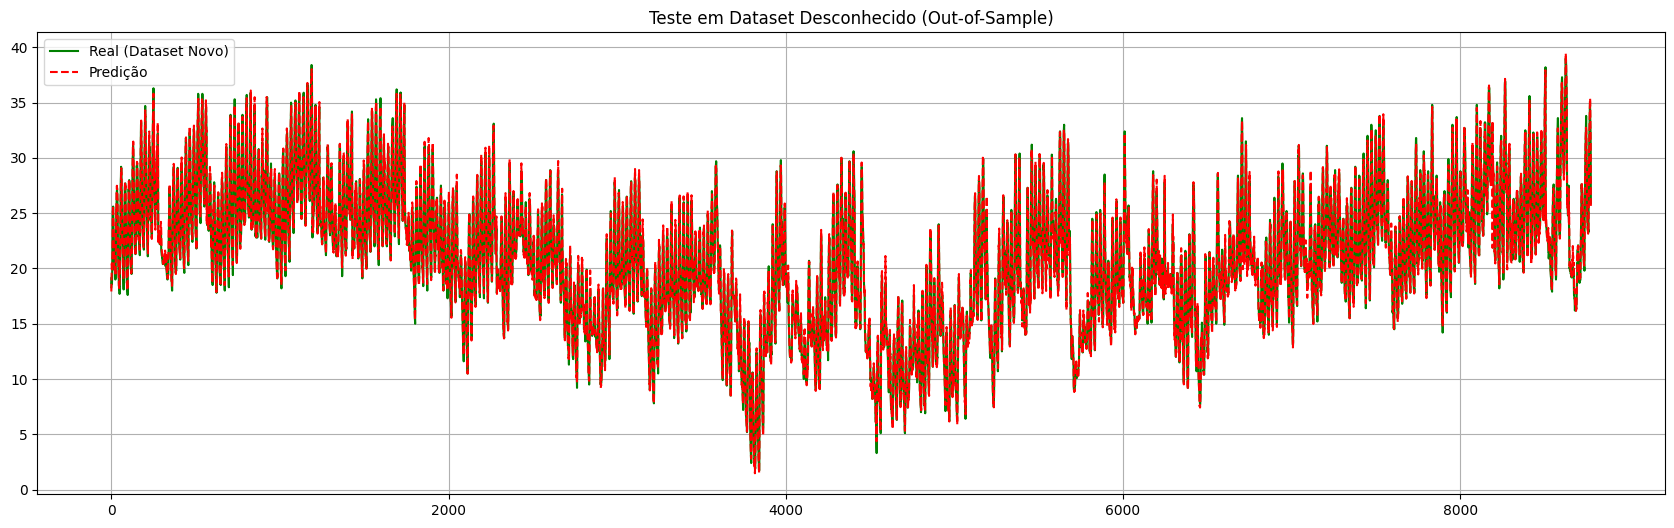

In [54]:
# Calcular erros
mse_ext_multi_exogena = mean_squared_error(y_teste_real_multi_exogena, predictions_ext_real_multi_exogena)
mae_ext_multi_exogena = mean_absolute_error(y_teste_real_multi_exogena, predictions_ext_real_multi_exogena)
print(f"mse : {mse_ext_multi_exogena:.2f}")
print(f"Erro Médio Absoluto (MAE) no Novo Dataset: {mae_ext_multi_exogena:.2f} °C")
print(f"Isso significa que o modelo erra, em média, {mae_ext_multi_exogena:.2f} graus para cima ou para baixo.")

# Plotar um trecho
plt.figure(figsize=(21, 6))
limit = 10000 # Visualizar as primeiras 300 horas
plt.plot(y_teste_real_multi_exogena[:limit], label='Real (Dataset Novo)', color='green')
plt.plot(predictions_ext_real_multi_exogena[:limit], label='Predição', color='red', linestyle='--')
plt.title('Teste em Dataset Desconhecido (Out-of-Sample)')
plt.legend()
plt.grid(True)
plt.show()

Tamanho das Datas: 8776
Tamanho das Predições: 8776


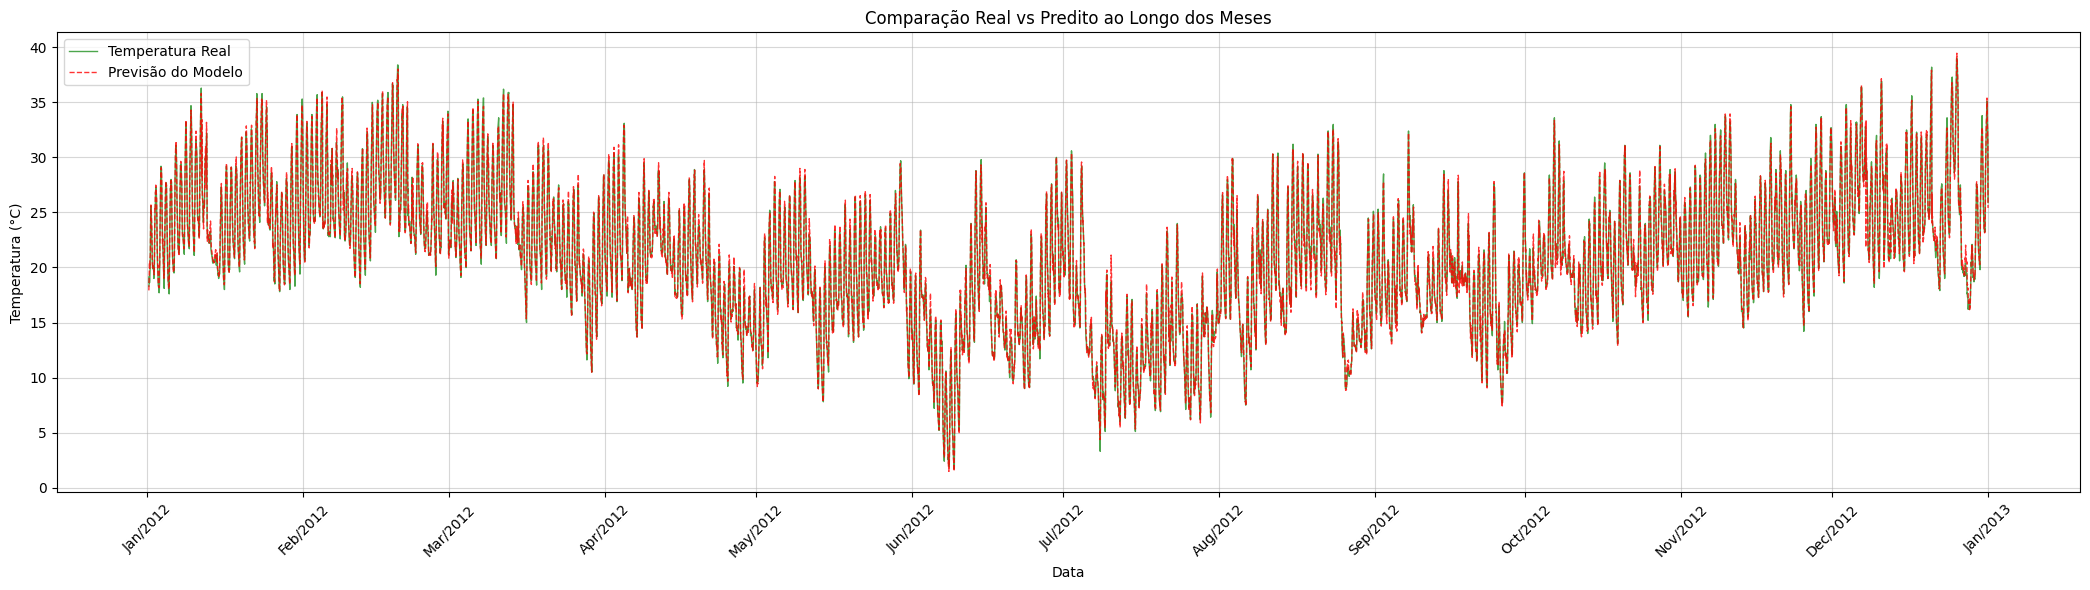

In [55]:
prediction_sequence_length_multi_exogena = X_teste_ext_multi_exogena.shape[1]
datas_correspondentes_multi_exogena = temp_teste_multi_exogena.index[prediction_sequence_length_multi_exogena:]

# Vamos garantir que os tamanhos batem
print(f"Tamanho das Datas: {len(datas_correspondentes_multi_exogena)}")
print(f"Tamanho das Predições: {len(predictions_ext_real_multi_exogena)}")

df_resultado_multi_exogena = pd.DataFrame({
    'Real': y_teste_real_multi_exogena.flatten(),
    'Predito': predictions_ext_real_multi_exogena.flatten()
}, index=datas_correspondentes_multi_exogena)


fig, ax = plt.subplots(figsize=(21, 6))

ax.plot(df_resultado_multi_exogena.index, df_resultado_multi_exogena['Real'], label='Temperatura Real', color='green', linewidth=1, alpha=0.7)
ax.plot(df_resultado_multi_exogena.index, df_resultado_multi_exogena['Predito'], label='Previsão do Modelo', color='red', linewidth=1, alpha=0.8, linestyle='--')

# Define o formatador para mostrar o nome do mês (ex: Jan, Fev...)
ax.xaxis.set_major_locator(mdates.MonthLocator()) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y')) # Formato: "Jan/2022"

plt.title('Comparação Real vs Predito ao Longo dos Meses')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True, alpha=0.5)
plt.xticks(rotation=45) # Gira as datas para não encavalar
plt.tight_layout()
plt.show()

## função usada para comparar qual lag usar em cada modelo

In [ ]:
def train_and_evaluate_lstm(sequence_length, treino_combined_data, val_combined_data, teste_combined_data, target_scaler):
    
    # 1. Cria sequências multivariada
    X_train_final, y_train_final = create_multivariate_sequences(treino_combined_data, sequence_length)
    X_val_final, y_val_final = create_multivariate_sequences(val_combined_data, sequence_length)
    X_teste_ext, y_teste_ext = create_multivariate_sequences(teste_combined_data, sequence_length)

    # 2. EarlyStopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,             
        mode='min',
        restore_best_weights=True
    )

    # 3. Definição do modelo
    model = Sequential()
    model.add(LSTM(units=64, activation='relu', return_sequences=False,
                   input_shape=(X_train_final.shape[1], X_train_final.shape[2])))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    # 5. Treinamento
    history = model.fit(
        X_train_final,
        y_train_final,
        epochs=50,             
        batch_size=32,
        verbose=0,              
        validation_data=(X_val_final, y_val_final),
        callbacks=[early_stopping]
    )

    # 6. Previsões
    predictions_scaled = model.predict(X_teste_ext, verbose=0)
    predictions_real = target_scaler.inverse_transform(predictions_scaled)
    y_teste_real = target_scaler.inverse_transform(y_teste_ext.reshape(-1, 1))

    # 7. Métricas
    mse = mean_squared_error(y_teste_real, predictions_real)
    mae = mean_absolute_error(y_teste_real, predictions_real)

    return model, mse, mae, history

import pandas as pd

def compare_lstm_lags(treino_data, val_data, teste_data, target_scaler, lags=[4, 6, 8, 12, 24]):
    
    results_list = []
    
    print(f"{'='*10} Iniciando Comparação de Lags: {lags} {'='*10}\n")
    
    for lag in lags:
        print(f"Treinando modelo com Lag: {lag}...")
        
        # Chama a sua função de treino definida anteriormente
        model, mse, mae, history = train_and_evaluate_lstm(
            lag, 
            treino_data, 
            val_data, 
            teste_data, 
            target_scaler
        )
        
    
        results_list.append({
            'Lag': lag,
            'MSE': mse,
            'MAE': mae,
            'Epochs': len(history.epoch)
        })
        
        print(f"-> Concluído (MSE: {mse:.4f})\n")

    df_results = pd.DataFrame(results_list)
    
    # Ordena pelo menor erro
    df_results = df_results.sort_values(by='MSE', ascending=True).reset_index(drop=True)
    
    return df_results

df_comparacao = compare_lstm_lags(
    treino_combined_data, 
    val_combined_data, 
    teste_combined_data, 
    target_scaler
)


print("\n=== Tabela de Resultados ===")
print(df_comparacao)

# tunagem de parametros para modelo com exogenas date_time e físicas

In [56]:
#Divisão do dataset em treino e teste
temp_treino_multi_exogena = base[base.index.year == 2010]
treino_multi_exogena = temp_treino_multi_exogena['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']
temp_validacao_multi_exogena = base[base.index.year == 2011]
validacao_multi_exogena = temp_validacao_multi_exogena['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)']

In [57]:
# --- FUNÇÃO AUXILIAR PARA CRIAR O TEMPO CÍCLICO ---
def adicionar_tempo_ciclico(df):
    df_copy = df.copy()
    # 1. Transformação da HORA (Ciclo Diário)
    # Permite ao modelo aprender ciclo dia/noite
    df_copy['hora_sin'] = np.sin(2 * np.pi * df_copy.index.hour / 24)
    df_copy['hora_cos'] = np.cos(2 * np.pi * df_copy.index.hour / 24)

    # 2. Transformação do DIA DO ANO (Ciclo Anual - Substitui Mês e Dia)
    # Permite ao modelo aprender Verão/Inverno de forma contínua
    df_copy['dia_ano_sin'] = np.sin(2 * np.pi * df_copy.index.dayofyear / 365.25)
    df_copy['dia_ano_cos'] = np.cos(2 * np.pi * df_copy.index.dayofyear / 365.25)

    return df_copy

# 1. Aplicar a transformação nos DataFrames
temp_treino_multi_exogena_proc = adicionar_tempo_ciclico(temp_treino_multi_exogena)
temp_validacao_multi_exogena_proc = adicionar_tempo_ciclico(temp_validacao_multi_exogena)

# 2. Defina as colunas
target_column = 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'

exog_columns_datetime = ['hora_sin', 'hora_cos', 'dia_ano_sin', 'dia_ano_cos']
exog_columns_fisicas = [
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'VENTO, RAJADA MAXIMA (m/s)'
]

# 3. Extraia e escale APENAS a variável alvo (Temperatura)
treino_target_multi_exogena = temp_treino_multi_exogena_proc[target_column].values.reshape(-1, 1)
val_target_multi_exogena = temp_validacao_multi_exogena_proc[target_column].values.reshape(-1, 1)

target_scaler_multi_exogena = StandardScaler()
treino_target_scaled_multi_exogena = target_scaler_multi_exogena.fit_transform(treino_target_multi_exogena)
val_target_scaled_multi_exogena = target_scaler_multi_exogena.transform(val_target_multi_exogena)

# 4. Extraia as variáveis exógenas
treino_exog_datetime = temp_treino_multi_exogena_proc[exog_columns_datetime].values
val_exog_datetime = temp_validacao_multi_exogena_proc[exog_columns_datetime].values

treino_exog_fisicas = temp_treino_multi_exogena_proc[exog_columns_fisicas].values
val_exog_fisicas = temp_validacao_multi_exogena_proc[exog_columns_fisicas].values

fisicas_exog_scaler = StandardScaler()
treino_exog_fisicas_scaled = fisicas_exog_scaler.fit_transform(treino_exog_fisicas)
val_exog_fisicas_scaled = fisicas_exog_scaler.transform(val_exog_fisicas)

treino_multi_exogena = np.hstack((treino_exog_datetime, treino_exog_fisicas_scaled))
val_multi_exogena = np.hstack((val_exog_datetime, val_exog_fisicas_scaled))

print("Shape do Alvo Treino:", treino_target_scaled_multi_exogena.shape)
print("Shape das Exógenas Treino:", treino_multi_exogena.shape)
print("Exemplo de Exógena (Hora Sin/Cos, Ano Sin/Cos, Físicas Escalonadas):\n", treino_multi_exogena[:2])

Shape do Alvo Treino: (8760, 1)
Shape das Exógenas Treino: (8760, 7)
Exemplo de Exógena (Hora Sin/Cos, Ano Sin/Cos, Físicas Escalonadas):
 [[ 0.          1.          0.01720158  0.99985204  0.2219003  -0.51265948
   0.50632327]
 [ 0.25881905  0.96592583  0.01720158  0.99985204  0.25487144 -0.51265948
   0.73699887]]


In [58]:
# 1. Combinar Temperatura (Escalada) com Tempo (Seno/Cosseno) e Exógenas Físicas Escaladas
# A estrutura será: [Temperatura, Hora_Sin, Hora_Cos, DiaAno_Sin, DiaAno_Cos, P_ATM, UMIDADE, VENTO_RAJADA]
treino_combined_data_multi_exogena = np.hstack((treino_target_scaled_multi_exogena, treino_multi_exogena))
val_combined_data_multi_exogena = np.hstack((val_target_scaled_multi_exogena, val_multi_exogena))

# 2. Verificar shapes
print("Shape final dos dados de treino:", treino_combined_data_multi_exogena.shape)
print("Shape final dos dados de validação:", val_combined_data_multi_exogena.shape)

# O resultado deve ter 8 colunas (1 alvo + 4 tempo + 3 físicas)
print("Primeiras 5 linhas do treino:\n", treino_combined_data_multi_exogena[:5])

Shape final dos dados de treino: (8760, 8)
Shape final dos dados de validação: (8760, 8)
Primeiras 5 linhas do treino:
 [[ 0.2735459   0.          1.          0.01720158  0.99985204  0.2219003
  -0.51265948  0.50632327]
 [ 0.18621411  0.25881905  0.96592583  0.01720158  0.99985204  0.25487144
  -0.51265948  0.73699887]
 [ 0.13381503  0.5         0.8660254   0.01720158  0.99985204  0.23838587
  -0.38035441  0.69855293]
 [ 0.08141596  0.70710678  0.70710678  0.01720158  0.99985204  0.20541473
  -0.31420188  0.62166107]
 [-0.00591583  0.8660254   0.5         0.01720158  0.99985204  0.09001573
  -0.18189681  0.23720175]]


In [59]:
def create_multivariate_sequences(data, sequence_length):
    X, y = [], []
    # O loop para antes de estourar o array
    for i in range(len(data) - sequence_length):
        # X: Pega todas as colunas (Temp + Tempo) do passo atual até o tamanho da janela
        X.append(data[i:(i + sequence_length), :])

        # y: Pega APENAS a temperatura (coluna 0) do PRÓXIMO passo
        y.append(data[i + sequence_length, 0])

    return np.array(X), np.array(y)

sequence_length_multi_exogena = 8

# Criação das sequências
X_train_final_multi_exogena, y_train_final_multi_exogena = create_multivariate_sequences(treino_combined_data_multi_exogena, sequence_length_multi_exogena)
X_val_final_multi_exogena, y_val_final_multi_exogena = create_multivariate_sequences(val_combined_data_multi_exogena, sequence_length_multi_exogena)

print("Shape of X_train_final:", X_train_final_multi_exogena.shape) # Deve ser (N, sequence lenght, 1 ou 5)
print("Shape of y_train_final:", y_train_final_multi_exogena.shape) # Deve ser (N,)
print("Shape of X_val_final:", X_val_final_multi_exogena.shape)
print("Shape of y_val_final:", y_val_final_multi_exogena.shape)

Shape of X_train_final: (8752, 8, 8)
Shape of y_train_final: (8752,)
Shape of X_val_final: (8752, 8, 8)
Shape of y_val_final: (8752,)


In [60]:
# 2. Aplique EXATAMENTE a mesma função de engenharia de features usada no treino
# (A função adicionar_tempo_ciclico que criamos antes)
temp_teste_multi_exogena = base[base.index.year == 2012]
temp_teste_multi_exogena = adicionar_tempo_ciclico(temp_teste_multi_exogena)

# 3. Selecione as mesmas colunas
target_column = 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'
exog_columns_datetime = ['hora_sin', 'hora_cos', 'dia_ano_sin', 'dia_ano_cos']
exog_columns_fisicas = [
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'VENTO, RAJADA MAXIMA (m/s)'
]

# Verifique se não há NaNs (o shift ou cálculo pode gerar nulos nas pontas)
temp_teste_multi_exogena = temp_teste_multi_exogena.dropna()

In [61]:
# 1. Extrair a variável alvo do novo dataset
# Precisamos dela para comparar se o modelo acertou depois (y_true)
teste_target_multi_exogena = temp_teste_multi_exogena[target_column].values.reshape(-1, 1)

# 2. Extrair as exógenas (Seno/Cosseno)
teste_exog_datetime = temp_teste_multi_exogena[exog_columns_datetime].values
teste_exog_fisicas = temp_teste_multi_exogena[exog_columns_fisicas].values

teste_exog_fisicas_scaled = fisicas_exog_scaler.transform(teste_exog_fisicas)
teste_multi_exogena = np.hstack((teste_exog_datetime, teste_exog_fisicas_scaled))

teste_target_scaled_multi_exogena = target_scaler_multi_exogena.transform(teste_target_multi_exogena)

# 3. Combinar (Target Escalado + Exógenas Cíclicas)
teste_combined_data_multi_exogena = np.hstack((teste_target_scaled_multi_exogena, teste_multi_exogena))
# teste_combined_data = teste_target_scaled
print("Shape dos dados de teste prontos:", teste_combined_data_multi_exogena.shape)

Shape dos dados de teste prontos: (8784, 8)


In [62]:
# 1. Criar as sequências (Janelas)
# Reutilizamos a função create_multivariate_sequences
X_teste_ext_multi_exogena, y_teste_ext_multi_exogena = create_multivariate_sequences(teste_combined_data_multi_exogena, sequence_length_multi_exogena)

print("Shape de entrada para o modelo:", X_teste_ext_multi_exogena.shape)

Shape de entrada para o modelo: (8776, 8, 8)


Reloading Tuner from tuner_logs_multi_exogena/lstm_tunning_multi_exogena/tuner0.json
>>> Iniciando Tunagem MULTI EXOGENA...

>>> MELHORES PARÂMETROS (MULTI EXOGENA):
- Camadas: 1
- Batch Size: 128
- Units: 160
- Learning Rate: 0.001
- Dropout: 0.1

Epoch 1/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.3468 - val_loss: 0.0381
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0380 - val_loss: 0.0261
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 0.0283 - val_loss: 0.0230
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0250 - val_loss: 0.0210
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0242 - val_loss: 0.0186
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0214 - val_loss: 0.0182
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0203 - val_loss: 0.0155
Epoch 8/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0190 - val_loss: 0.0144
Epoch 9/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0

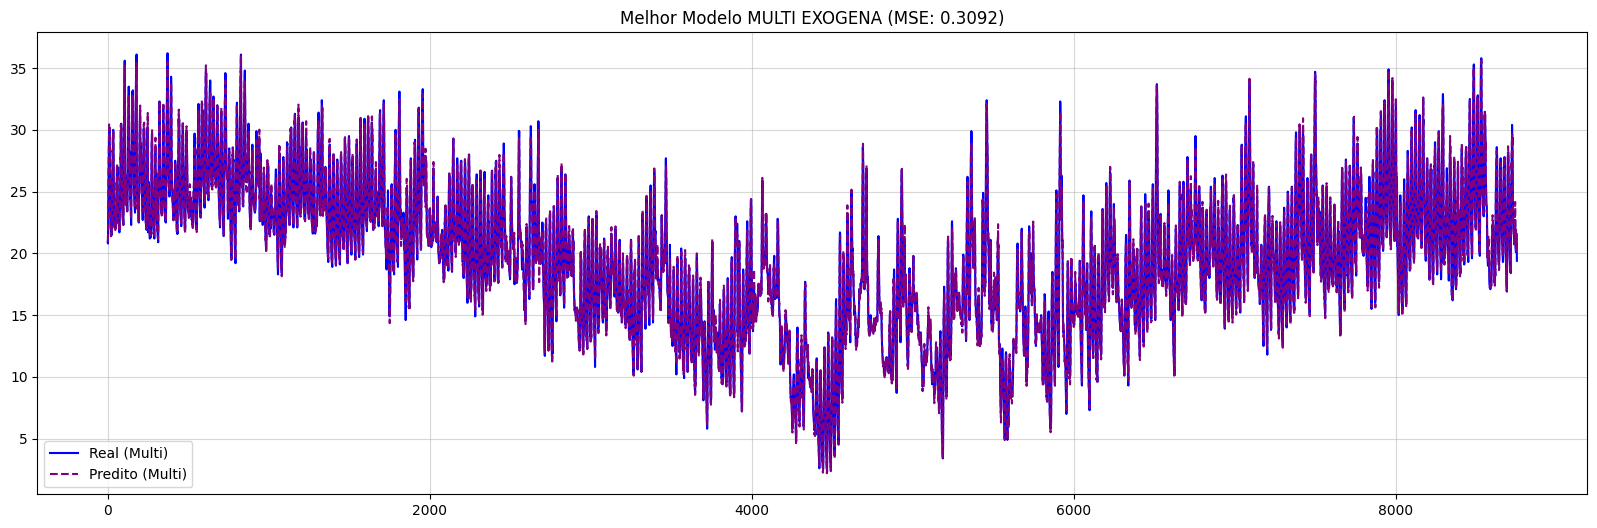

In [ ]:
import keras_tuner as kt
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

# ==========================================
# 0. CONFIGURAÇÕES INICIAIS
# ==========================================

# Callback específico para o Tunning deste modelo
early_stopping_tunning_multi = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min',
    restore_best_weights=True
)

# ==========================================
# 1. CONSTRUÇÃO DO MODELO (MULTI EXOGENA)
# ==========================================

def build_model_multi_exogena(hp):
    model = Sequential()

    # --- Hiperparâmetros ---
    hp_units = hp.Int('units', min_value=32, max_value=256, step=32)
    hp_lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_dropout = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)

    hp_layers = hp.Int('num_layers', 1, 3)

    input_shape = (X_train_final_multi_exogena.shape[1], X_train_final_multi_exogena.shape[2])

    for i in range(hp_layers):
        is_last_layer = (i == hp_layers - 1)

        model.add(LSTM(
            units=hp_units,
            activation='relu',
            return_sequences=not is_last_layer,
            input_shape=input_shape if i == 0 else None
        ))

        model.add(Dropout(hp_dropout))

    model.add(Dense(1))

    model.compile(optimizer=Adam(learning_rate=hp_lr),
                  loss='mean_squared_error')

    return model

# ==========================================
# 2. TUNER PERSONALIZADO (MULTI EXOGENA)
# ==========================================

class MyTunerMultiExogena(kt.RandomSearch):
    def run_trial(self, trial, *args, **kwargs):
        kwargs['batch_size'] = trial.hyperparameters.Choice('batch_size', values=[16, 32, 64, 128])
        return super(MyTunerMultiExogena, self).run_trial(trial, *args, **kwargs)

# ==========================================
# 3. EXECUTANDO A BUSCA (ISOLADA)
# ==========================================

early_stopping_final = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

# Configura o Tuner com diretórios e nomes 
tuner_multi = MyTunerMultiExogena(
    build_model_multi_exogena,
    objective='val_loss',
    max_trials=50,
    executions_per_trial=1,
    directory='tuner_logs_multi_exogena',       
    project_name='lstm_tunning_multi_exogena',   
    overwrite=False
)

print(">>> Iniciando Tunagem MULTI EXOGENA...")

tuner_multi.search(
    X_train_final_multi_exogena,
    y_train_final_multi_exogena,
    epochs=50,
    validation_data=(X_val_final_multi_exogena, y_val_final_multi_exogena),
    callbacks=[early_stopping_tunning_multi],
    verbose=1
)

# ==========================================
# 4. RECUPERANDO E TREINANDO O FINAL
# ==========================================

best_hps_multi = tuner_multi.get_best_hyperparameters()[0]
best_batch_size_multi = best_hps_multi.get('batch_size')

print(f"""
>>> MELHORES PARÂMETROS (MULTI EXOGENA):
- Camadas: {best_hps_multi.get('num_layers')}
- Batch Size: {best_batch_size_multi}
- Units: {best_hps_multi.get('units')}
- Learning Rate: {best_hps_multi.get('learning_rate')}
- Dropout: {best_hps_multi.get('dropout')}
""")

# Constrói o modelo final
best_model_multi_exogena = tuner_multi.hypermodel.build(best_hps_multi)

# Treina o modelo final
history_multi = best_model_multi_exogena.fit(
    X_train_final_multi_exogena,
    y_train_final_multi_exogena,
    epochs=100,
    batch_size=best_batch_size_multi,
    validation_data=(X_val_final_multi_exogena, y_val_final_multi_exogena),
    callbacks=[early_stopping_final],
    verbose=1
)

# ==========================================
# 5. VISUALIZAÇÃO
# ==========================================

predictions_scaled_multi = best_model_multi_exogena.predict(X_val_final_multi_exogena)

predictions_real_multi = target_scaler_multi_exogena.inverse_transform(predictions_scaled_multi)
y_val_real_multi = target_scaler_multi_exogena.inverse_transform(y_val_final_multi_exogena.reshape(-1, 1))

mse_val_multi = mean_squared_error(y_val_real_multi, predictions_real_multi)

plt.figure(figsize=(20, 6))
plt.plot(y_val_real_multi[:10000], label='Real (Multi)', color='blue')
plt.plot(predictions_real_multi[:10000], label='Predito (Multi)', color='purple', linestyle='--')
plt.title(f'Melhor Modelo MULTI EXOGENA (MSE: {mse_val_multi:.4f})')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


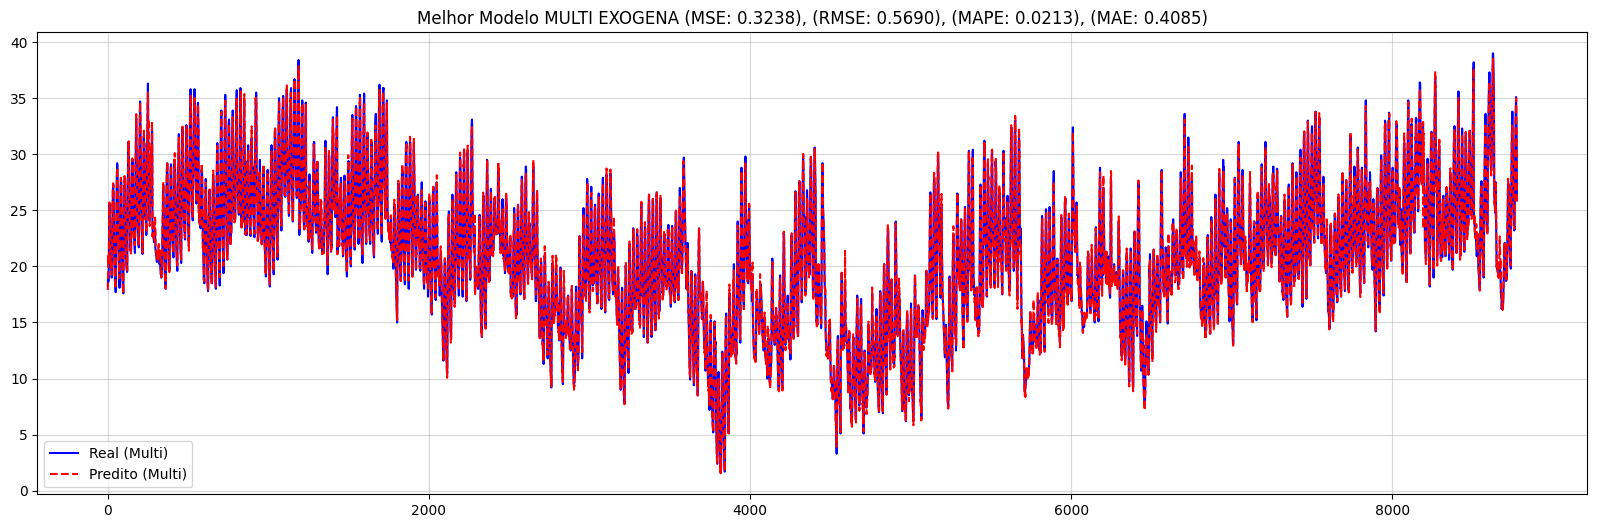

In [ ]:
# ==========================================
# 5. VISUALIZAÇÃO
# ==========================================

predictions_scaled_multi = best_model_multi_exogena.predict(X_teste_ext_multi_exogena)

predictions_real_multi = target_scaler_multi_exogena.inverse_transform(predictions_scaled_multi)
y_val_real_multi = target_scaler_multi_exogena.inverse_transform(y_teste_ext_multi_exogena.reshape(-1, 1))

mse_val_multi = mean_squared_error(y_val_real_multi, predictions_real_multi)
mae_val_multi = mean_absolute_error(y_val_real_multi, predictions_real_multi)
rmse_val_multi = root_mean_squared_error(y_val_real_multi, predictions_real_multi)
mape_val_multi = mean_absolute_percentage_error(y_val_real_multi, predictions_real_multi)

plt.figure(figsize=(20, 6))
plt.plot(y_val_real_multi[:10000], label='Real (Multi)', color='blue')
plt.plot(predictions_real_multi[:10000], label='Predito (Multi)', color='red', linestyle='--')
plt.title(f'Melhor Modelo MULTI EXOGENA (MSE: {mse_val_multi:.4f}), (RMSE: {rmse_val_multi:.4f}), (MAPE: {mape_val_multi:.4f}), (MAE: {mae_val_multi:.4f})')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()
